In [8]:
# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display
from scipy.stats import mannwhitneyu, wilcoxon

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from lib.gallegosalas.data_fc_db import DataFCDatabase
from mesostat.metric.metric import MetricCalculator

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
params = {}
# params['experiment_path']  = gui_fpath("Path to data collection",  './')
# params['experiment_path'] = '/media/alyosha/Data/TE_data/yasirdata/auditory_task_all_trials'
# params['experiment_path'] = '/media/alyosha/Data/TE_data/yasirdata/tactile_task_all_trials'
params['experiment_path'] = '/media/alyosha/Data/TE_data/yasirdata/active_passive'

In [10]:
dataDB = DataFCDatabase(params)

Target range of [20, 95] timesteps amounts to [1.0, 4.7, 'seconds']
Reading channel label file
Searching for data files


In [11]:
dataDB.read_neuro_files()
len(dataDB.dataNeuronal)

IntProgress(value=0, description='Read Neuro Data:', max=16)

16

# Nans as function of Time

(377, 75, 25)


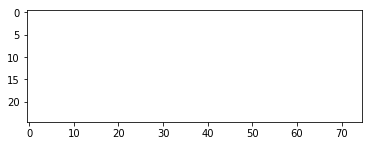

(171, 75, 25)


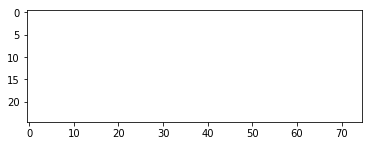

(212, 75, 25)


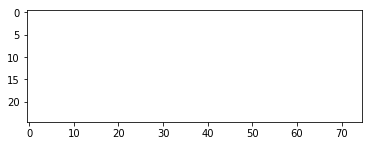

(334, 75, 25)


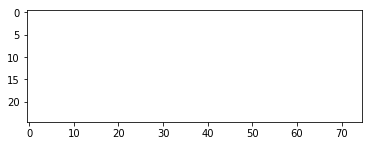

(500, 75, 25)


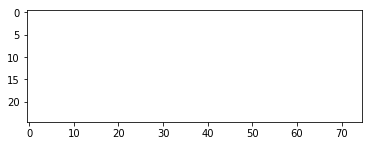

(63, 75, 25)


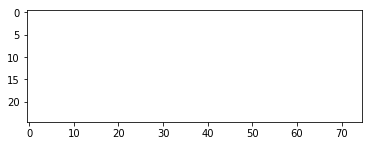

(181, 75, 25)


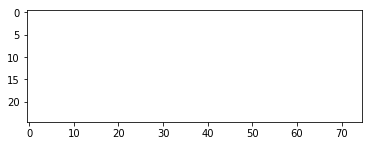

(205, 75, 25)


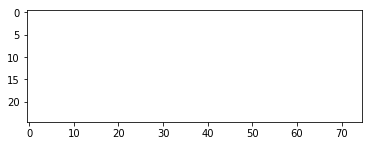

(151, 75, 25)


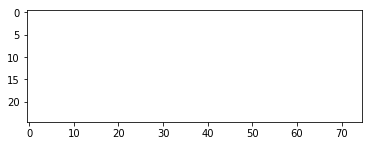

(232, 75, 25)


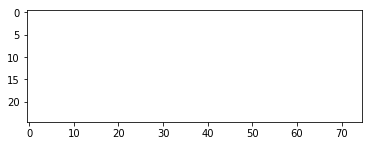

(165, 75, 25)


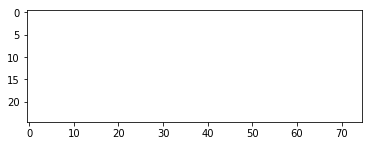

(504, 75, 25)


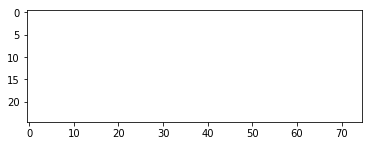

(518, 75, 25)


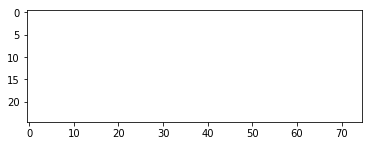

(137, 75, 25)


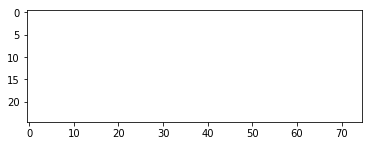

(315, 75, 25)


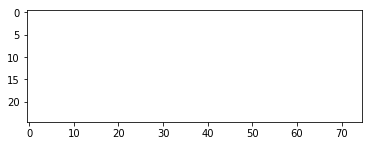

(240, 75, 25)


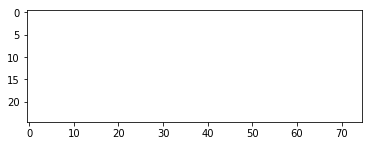

In [12]:
for data in dataDB.dataNeuronal:
    print(data.shape)
    plt.figure()
    dataEff = (np.sum(np.isnan(data), axis=0).T).astype(float)
    dataEff[dataEff == 0.0] = np.nan
    plt.imshow(dataEff)
    plt.show()

# Nans as functions of Trial number

Seems like the region of interest is timesteps 20-90, but some of them still have nans

377


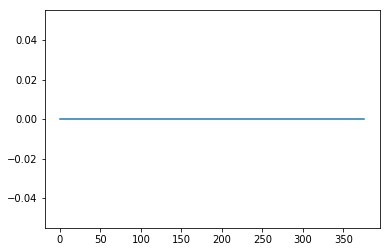

171


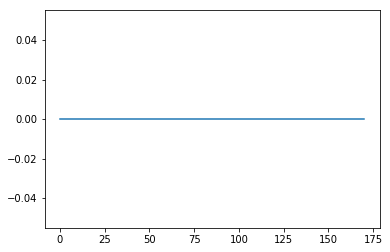

212


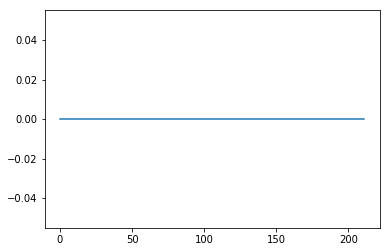

334


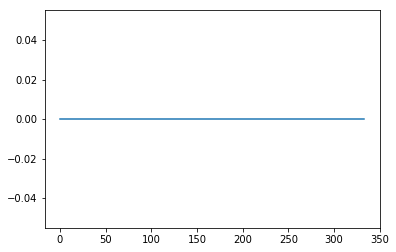

500


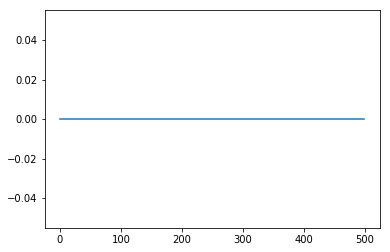

63


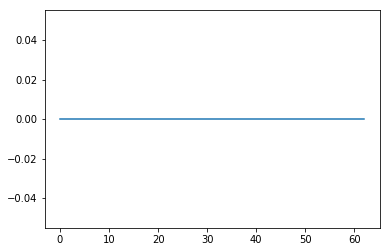

181


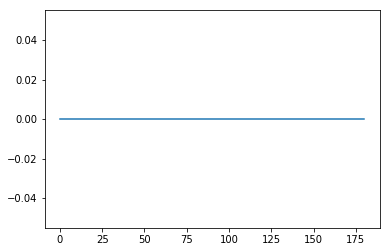

205


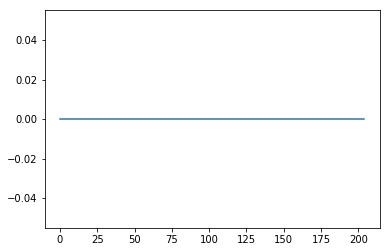

151


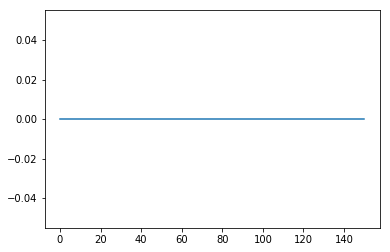

232


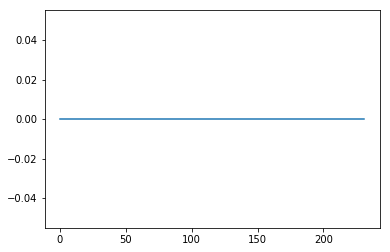

165


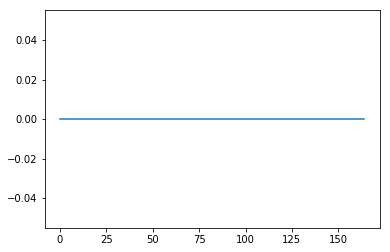

504


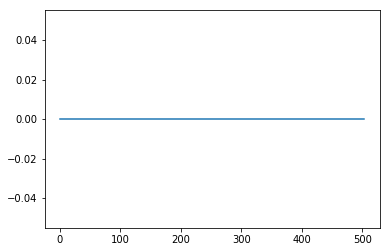

518


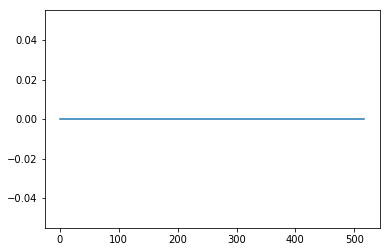

137


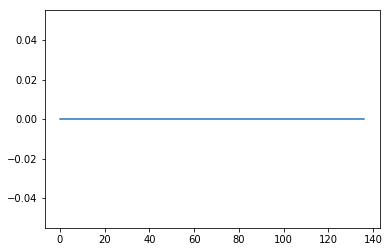

315


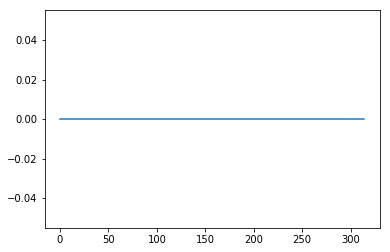

240


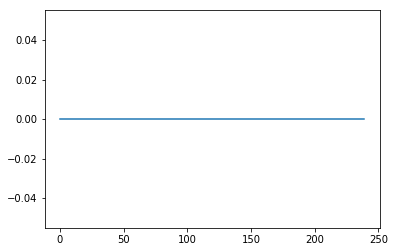

In [13]:
for data in dataDB.dataNeuronal:
    plt.figure()
    dataEff = np.sum(np.isnan(data[:, 20:95][:,:,:25]), axis=(1, 2)).T.astype(float)
#     dataEff[dataEff == 0.0] = np.nan
    print(np.sum(dataEff == 0))

    plt.plot(dataEff)
    plt.show()